In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 146.3 kB/s eta 0:04:21
   ---------------------------------------- 0.0/38.1 MB 146.3 kB/s eta 0:04:21
   ---------------------------------------- 0.0/38.1 MB 151.3 kB/s eta 0:04:12
   ---------------------------------------- 0.1/38.1 MB 231.8 kB/s eta 0:02:44
   ---------------------------------------- 0.1/38.1 MB 231.8 kB/s eta 0:02:44
   ---------------------------------------- 0.1/38.1 MB 312.2 kB/s eta 0:02:02
   ---------------------------------------- 0.1/38.1 MB 312.2 kB/s eta 0:02:02
   -------------

In [5]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using c

In [6]:
import os
import cv2 as cv
import pandas as pd
import numpy as pd
import tensorflow as tf
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
IMAGE_SIZE = 256

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)

In [72]:
f1 = os.path.join("dataset/COVID")
f2 = os.path.join("dataset/Lung_Opacity")
f3 = os.path.join("dataset/Normal")
file1 = os.listdir(f1)
file2 = os.listdir(f2)
file3 = os.listdir(f3)

min_file_len_viral = os.listdir("dataset/Viral Pneumonia")

dd = 0
for i in range(len(file1)-len(min_file_len_viral)):

    file_path = os.path.join(f1, file1[i])
    if os.path.isfile(file_path):
        try:
            os.remove(file_path)
            dd += 1
        except OSError as e:
            print(f"Error {file_path}: {e}")

In [73]:
aa = 0
for i in range(len(file2)-len(min_file_len_viral)):

    file_path = os.path.join(f2, file2[i])
    if os.path.isfile(file_path):
        try:
            os.remove(file_path)
            aa += 1
        except OSError as e:
            print(f"Error {file_path}: {e}")

In [74]:
bb = 0
for i in range(len(file3)-len(min_file_len_viral)):

    file_path = os.path.join(f3, file3[i])
    if os.path.isfile(file_path):
        try:
            os.remove(file_path)
            bb += 1
        except OSError as e:
            print(f"Error {file_path}: {e}")

In [75]:
train_datasets = "dataset"

train_set = train_datagen.flow_from_directory(
    train_datasets,
    target_size = (256, 256),
    class_mode = 'categorical',
    classes = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
    subset = "training"
)

test_set = train_datagen.flow_from_directory(
    train_datasets,
    target_size = (256, 256),
    class_mode = 'categorical',
    classes = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
    subset = "validation"
)

Found 4036 images belonging to 4 classes.
Found 1344 images belonging to 4 classes.


In [76]:
train_set[0]

(array([[[[0.1254902 , 0.1254902 , 0.1254902 ],
          [0.1254902 , 0.1254902 , 0.1254902 ],
          [0.1254902 , 0.1254902 , 0.1254902 ],
          ...,
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ]],
 
         [[0.12216859, 0.12216859, 0.12216859],
          [0.12216859, 0.12216859, 0.12216859],
          [0.12216859, 0.12216859, 0.12216859],
          ...,
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ],
          [0.0627451 , 0.0627451 , 0.0627451 ]],
 
         [[0.12716731, 0.12716731, 0.12716731],
          [0.12716731, 0.12716731, 0.12716731],
          [0.12716731, 0.12716731, 0.12716731],
          ...,
          [0.06554444, 0.06554444, 0.06554444],
          [0.06554444, 0.06554444, 0.06554444],
          [0.06554444, 0.06554444, 0.06554444]],
 
         ...,
 
         [[0.14005426, 0.14005426, 0.14005426],
          [0.14005

In [77]:
covid = os.path.join("dataset/COVID")
lung = os.path.join("dataset/Lung_Opacity")
norm = os.path.join("dataset/Normal")
pheu = os.path.join("dataset/Viral Pneumonia")

covid_names = os.listdir(covid)
lung_names = os.listdir(lung)
norm_names = os.listdir(norm)
pheu_names = os.listdir(pheu)


covid_images = [os.path.join(covid, i) for i in covid_names]
lung_images = [os.path.join(lung, i) for i in lung_names]
norm_images = [os.path.join(norm, i) for i in norm_names]
pheu_images = [os.path.join(pheu, i)for i in pheu_names]

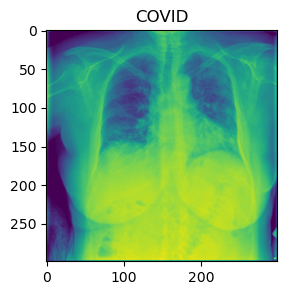

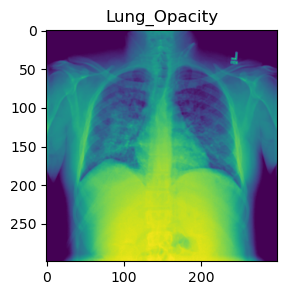

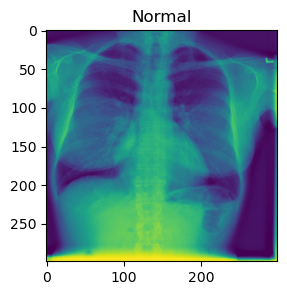

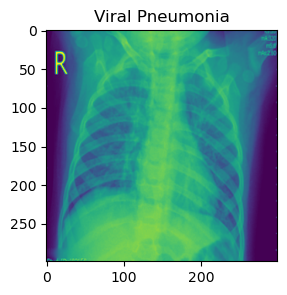

In [78]:
img = [mpimg.imread(covid_images[0]), mpimg.imread(lung_images[0]),
        mpimg.imread(norm_images[0]), mpimg.imread(pheu_images[0])]

names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

for i in range(len(img)):
    plt.figure(figsize=(3,3))
    plt.imshow(img[i])
    plt.title(names[i])
plt.show()

In [79]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPool2D(strides=2),
    layers.Conv2D(filters=48, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(strides=2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(strides=2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(strides=2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])


In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 48)      13872     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 64)        27712     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)       

In [81]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [83]:
if tf.test.gpu_device_name():
    print('GPU: {}'.format(tf.test.gpu_device_name()))
else:
    print('CPU')

CPU


In [84]:
device = '/GPU:0' if tf.test.gpu_device_name() else '/CPU:0'
device

'/CPU:0'

In [85]:
with tf.device(device):  # Выберите доступное устройство GPU
    model.fit(train_set, validation_data = test_set, epochs=5)

Epoch 1/5
127/127 [==============================] - 509s 4s/step - loss: 0.9011 - accuracy: 0.6308 - val_loss: 1.3750 - val_accuracy: 0.4062
Epoch 2/5
127/127 [==============================] - 487s 4s/step - loss: 0.7546 - accuracy: 0.6967 - val_loss: 1.5522 - val_accuracy: 0.5089
Epoch 3/5
127/127 [==============================] - 480s 4s/step - loss: 0.6200 - accuracy: 0.7587 - val_loss: 1.2462 - val_accuracy: 0.5588
Epoch 4/5
127/127 [==============================] - 481s 4s/step - loss: 0.5711 - accuracy: 0.7785 - val_loss: 0.8118 - val_accuracy: 0.6808
Epoch 5/5
127/127 [==============================] - 480s 4s/step - loss: 0.5370 - accuracy: 0.7931 - val_loss: 1.1301 - val_accuracy: 0.5900
